In [68]:
#Load libraries
# system
import os

#data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#maths
import math

#Scaling
from sklearn.preprocessing import StandardScaler
#factor Analysis
from sklearn.decomposition import FactorAnalysis

#Clustering
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing

In [69]:
#saving directories
os.listdir("..")

['6SQL', 'Personal', 'Project 3', 'Project2', 'Project2.zip']

In [70]:
#load data
san_train=pd.read_csv("credit-card-data.csv")

In [71]:
san_train.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [72]:
#remove Customer ID
san_train=san_train.iloc[:,1:18]
san_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [73]:
san_train.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Missing Value Analysis


In [74]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(san_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(san_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


In [75]:
missing_val

Variables  Missing_percentage
0                   MINIMUM_PAYMENTS            3.497207
1                       CREDIT_LIMIT            0.011173
2                            BALANCE            0.000000
3             CASH_ADVANCE_FREQUENCY            0.000000
4                   PRC_FULL_PAYMENT            0.000000
5                           PAYMENTS            0.000000
6                      PURCHASES_TRX            0.000000
7                   CASH_ADVANCE_TRX            0.000000
8   PURCHASES_INSTALLMENTS_FREQUENCY            0.000000
9                  BALANCE_FREQUENCY            0.000000
10        ONEOFF_PURCHASES_FREQUENCY            0.000000
11               PURCHASES_FREQUENCY            0.000000
12                      CASH_ADVANCE            0.000000
13            INSTALLMENTS_PURCHASES            0.000000
14                  ONEOFF_PURCHASES            0.000000
15                         PURCHASES            0.000000
16                            TENURE            0.000000

In [76]:
san_train['MINIMUM_PAYMENTS'].loc[70]

2180.881868

In [77]:
#Actual value 2180.881868
#mean=864.0540787425879
#median=335.598994
#we will go with mean
san_train['MINIMUM_PAYMENTS'].loc[70]=np.nan

C:\Users\PranjalJain\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
san_train['MINIMUM_PAYMENTS'].loc[70]

nan

In [79]:
#Impute with mean
san_train['MINIMUM_PAYMENTS'] = san_train['MINIMUM_PAYMENTS'].fillna(san_train['MINIMUM_PAYMENTS'].mean())
#Impute with median
#san_train['MINIMUM_PAYMENTS'] = san_train['MINIMUM_PAYMENTS'].fillna(san_train['MINIMUM_PAYMENTS'].median())


In [80]:
san_train.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [81]:
san_train=san_train.dropna()

In [82]:
san_train.shape

(8949, 17)

## EXPLORATORY DATA ANALYSIS

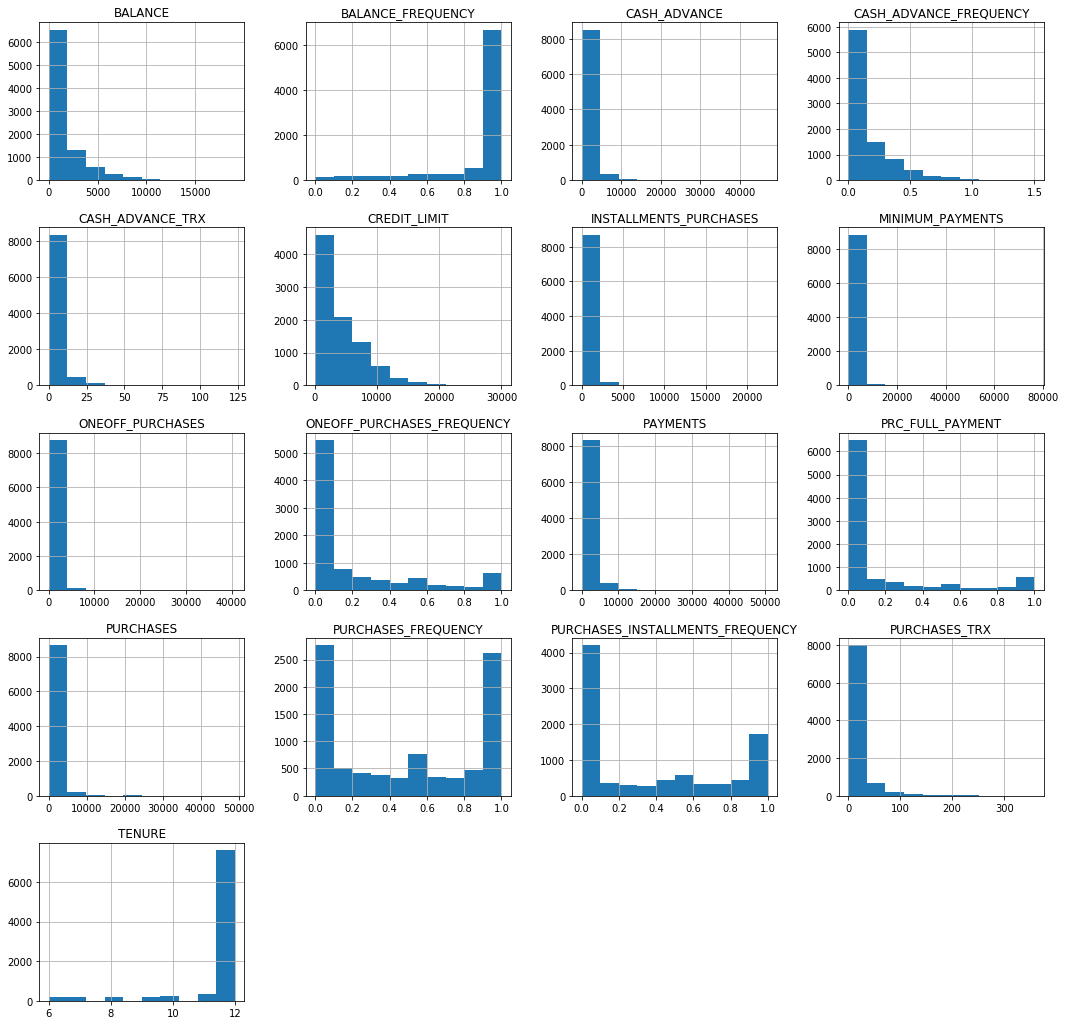

In [83]:
# EXPORATORY DATA ANALYSIS
san_train.hist(figsize=(18,18));



## Frequency

In [84]:
print("BALANCE_FREQUENCY ",san_train['BALANCE_FREQUENCY'].min(),san_train['BALANCE_FREQUENCY'].max())
print("PURCHASES_FREQUENCY",san_train['PURCHASES_FREQUENCY'].min(),san_train['PURCHASES_FREQUENCY'].max())
print("ONEOFF_PURCHASES_FREQUENCY",san_train['ONEOFF_PURCHASES_FREQUENCY'].min(),san_train['ONEOFF_PURCHASES_FREQUENCY'].max())
print("PURCHASES_INSTALLMENTS_FREQUENCY",san_train['PURCHASES_INSTALLMENTS_FREQUENCY'].min(),san_train['PURCHASES_INSTALLMENTS_FREQUENCY'].max())
print("CASH_ADVANCE_FREQUENCY",san_train['CASH_ADVANCE_FREQUENCY'].min(),san_train['CASH_ADVANCE_FREQUENCY'].max())

## Outlier Analysis

BALANCE_FREQUENCY  0.0 1.0
PURCHASES_FREQUENCY 0.0 1.0
ONEOFF_PURCHASES_FREQUENCY 0.0 1.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 1.0
CASH_ADVANCE_FREQUENCY 0.0 1.5


In [85]:
# Lets clean the data (inputing values and eliminating wrong data) before the segmentation
san_train.loc[(san_train['CASH_ADVANCE_FREQUENCY']>1)]
# we have 8 records for which the frequency is higher that 1. I will eliminate these  records

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
681   5656.069801           1.000000     362.36            362.36   
1626  2876.009336           1.000000     152.61            152.61   
2555  5906.184924           1.000000     141.80            141.80   
2608  7801.511533           1.000000     231.40            231.40   
3038  3846.742530           1.000000       0.00              0.00   
3253  5709.486507           0.833333       0.00              0.00   
8055  1917.895730           1.000000     285.07            285.07   
8365  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

In [86]:
# dropping the records with frequency higher that 1
san_train= san_train[(san_train[['CASH_ADVANCE_FREQUENCY']] <= 1).all(axis=1)]

In [87]:
san_train.shape

(8941, 17)

## Outlier Analysis

In [88]:
#outlier Analysis_________________________________________
#We are not taking TENURE because it is classifying month less than 12 as outlier but we can't remove months
#save numeric names
cnames =  ["BALANCE","PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES","CASH_ADVANCE","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]

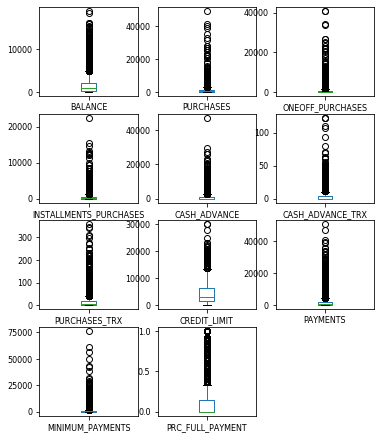

In [89]:
#Check for outliers until they are completely removed from the code

san_train[cnames].plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [90]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(san_train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min1 = q25 - (iqr*1.5)
    max1 = q75 + (iqr*1.5)
    print(min1,max1)
    san_train.loc[san_train[san_train.loc[:,i] > max1].index,i] = max1
    san_train.loc[san_train[san_train.loc[:,i] < min1].index,i] = min1

BALANCE
-2749.6532610000004 4924.555987
PURCHASES
-1567.105 2718.055
ONEOFF_PURCHASES
-867.99 1446.65
INSTALLMENTS_PURCHASES
-703.71 1172.85
CASH_ADVANCE
-1668.371169 2780.6186150000003
CASH_ADVANCE_TRX
-6.0 10.0
PURCHASES_TRX
-23.0 41.0
CREDIT_LIMIT
-5750.0 13850.0
PAYMENTS
-1896.7346195000002 4183.2882005
MINIMUM_PAYMENTS
-869.1141356138819 1903.9550073564697
PRC_FULL_PAYMENT
-0.21428549999999996 0.3571424999999999


In [91]:
san_train.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8941.000000        8941.000000  8941.000000       8941.000000   
mean   1386.867875           0.877259   737.957356        354.938920   
std    1532.569526           0.236879   880.200229        512.770515   
min       0.000000           0.000000     0.000000          0.000000   
25%     128.175207           0.888889    39.830000          0.000000   
50%     871.499977           1.000000   362.480000         38.000000   
75%    2046.727519           1.000000  1111.120000        578.660000   
max    4924.555987           1.000000  2718.055000       1446.650000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8941.000000   8941.000000          8941.000000   
mean               295.965527    670.477051             0.490713   
std                396.539195    996.534770             0.401385   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.580000      0.000000             0.500000   
75%                469.140000   1112.247446             0.916667   
max               1172.850000   2780.618615             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8941.000000                       8941.000000   
mean                     0.202530                          0.364804   
std                      0.298444                          0.397479   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8941.000000       8941.000000    8941.000000   8941.000000   
mean                 0.134194          2.376468      11.633822   4417.087365   
std                  0.197669          3.411961      13.044242   3383.262134   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.000000         10.000000      41.000000  13850.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8941.000000       8941.000000       8941.000000  8941.000000  
mean   1347.883188        593.282692          0.087311    11.521306  
std    1273.928212        571.765513          0.138658     1.331900  
min       0.000000          0.019163          0.000000     6.000000  
25%     383.273938        170.786793          0.000000    12.000000  
50%     857.533676        334.618726          0.000000    12.000000  
75%    1903.279643        864.054079          0.142857    12.000000  
max    4183.288201       1903.955007          0.357142    12.000000

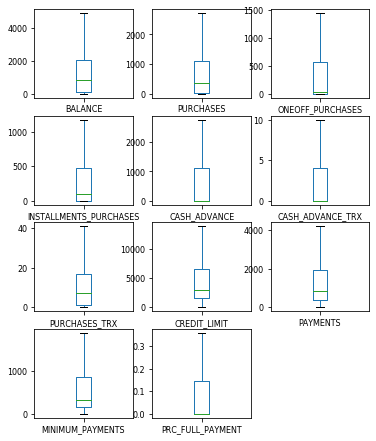

In [92]:
#Check for outlier once again
san_train[cnames].plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

## KIT

In [93]:
#monthly average purchase
san_train['MONTHLY_AVG_PURCHASE']=(san_train['PURCHASES']/(san_train['PURCHASES_FREQUENCY']*san_train['TENURE']))
#monthly cash advance amount
san_train['CASH_ADV_AMT']=(san_train['CASH_ADVANCE']/(san_train['CASH_ADVANCE_FREQUENCY']*san_train['TENURE']))
#purchases by type
san_train['Monthly_INSTALLMENTS_PURCHASES']=(san_train['INSTALLMENTS_PURCHASES']/(san_train['PURCHASES_INSTALLMENTS_FREQUENCY']*san_train['TENURE']))
san_train['Monthly_ONEOFF_PURCHASES']=(san_train['ONEOFF_PURCHASES']/(san_train['ONEOFF_PURCHASES_FREQUENCY']*san_train['TENURE']))
#average amount per purchase
san_train['AVG_AMT_PRC']=(san_train['PURCHASES']/san_train['PURCHASES_TRX'])
#limit usage(balance to credit limit ratio)
san_train['LIMIT_USAGE']=(san_train['BALANCE']/san_train['CREDIT_LIMIT'])
#payments to minimum payments ratio
san_train['PAY_MIN_PAY']=(san_train['PAYMENTS']/san_train['MINIMUM_PAYMENTS'])

In [94]:
#saving new variable
cnames2=["MONTHLY_AVG_PURCHASE","CASH_ADV_AMT","Monthly_INSTALLMENTS_PURCHASES","Monthly_ONEOFF_PURCHASES","AVG_AMT_PRC","LIMIT_USAGE","PAY_MIN_PAY"]

In [95]:
#removing infinity from new variables 
for i in cnames2:
    san_train.loc[san_train[san_train.loc[:,i] == math.inf].index,i] = 0
    san_train = san_train.replace(np.nan, 0)

In [96]:
san_train.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8941.000000        8941.000000  8941.000000       8941.000000   
mean   1386.867875           0.877259   737.957356        354.938920   
std    1532.569526           0.236879   880.200229        512.770515   
min       0.000000           0.000000     0.000000          0.000000   
25%     128.175207           0.888889    39.830000          0.000000   
50%     871.499977           1.000000   362.480000         38.000000   
75%    2046.727519           1.000000  1111.120000        578.660000   
max    4924.555987           1.000000  2718.055000       1446.650000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8941.000000   8941.000000          8941.000000   
mean               295.965527    670.477051             0.490713   
std                396.539195    996.534770             0.401385   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.580000      0.000000             0.500000   
75%                469.140000   1112.247446             0.916667   
max               1172.850000   2780.618615             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8941.000000                       8941.000000   
mean                     0.202530                          0.364804   
std                      0.298444                          0.397479   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
count             8941.000000  ...       8941.000000       8941.000000   
mean                 0.134194  ...        593.282692          0.087311   
std                  0.197669  ...        571.765513          0.138658   
min                  0.000000  ...          0.019163          0.000000   
25%                  0.000000  ...        170.786793          0.000000   
50%                  0.000000  ...        334.618726          0.000000   
75%                  0.222222  ...        864.054079          0.142857   
max                  1.000000  ...       1903.955007          0.357142   

            TENURE  MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  \
count  8941.000000           8941.000000   8941.000000   
mean     11.521306            115.942378    267.709696   
std       1.331900            176.592814    470.439965   
min       6.000000              0.000000      0.000000   
25%      12.000000             13.999995      0.000000   
50%      12.000000             64.763333      0.000000   
75%      12.000000            165.468333    380.467683   
max      12.000000           2718.065872   2780.629738   

       Monthly_INSTALLMENTS_PURCHASES  Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  \
count                     8941.000000               8941.000000  8941.000000   
mean                        41.928019                101.377707    69.392513   
std                         59.859619                182.587159   135.229534   
min                          0.000000                  0.000000     0.000000   
25%                          0.000000                  0.000000    12.290000   
50%                         21.561667                 27.212527    43.605610   
75%                         70.302465                135.179892    73.052083   
max                       1172.854691               1446.655787  2718.055000   

       LIMIT_USAGE  PAY_MIN_PAY  
count  8941.000000  8941.000000  
mean      0.373899     8.213379  
std       0.379109   115.620882  
min       0.000000     0.000000  
25%       0.041527     0.954

In [97]:
san_train.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
MONTHLY_AVG_PURCHASE                0
CASH_ADV_AMT                        0
Monthly_INSTALLMENTS_PURCHASES      0
Monthly_ONEOFF_PURCHASES            0
AVG_AMT_PRC                         0
LIMIT_USAGE                         0
PAY_MIN_PAY                         0
dtype: int64

## Feature Selection

Text(0.5, 1, 'Correlations')

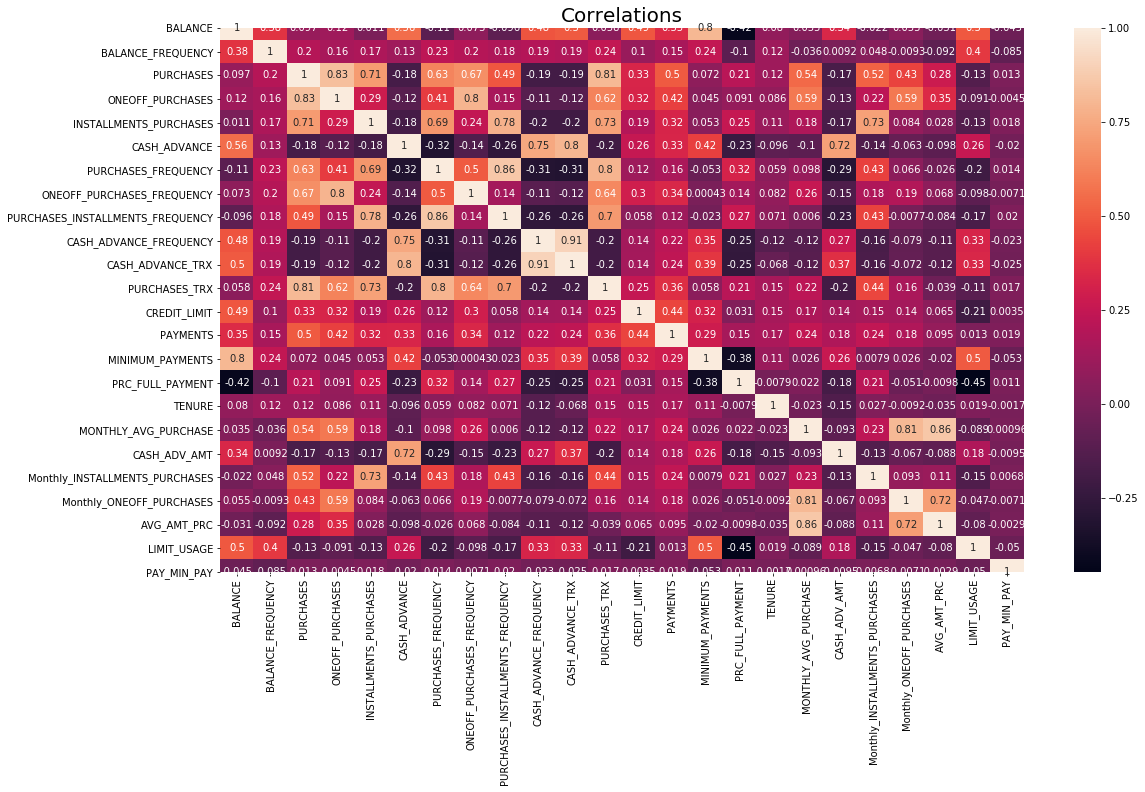

In [98]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(san_train.corr(),annot=True)
plt.title('Correlations', size = 20)

## Cluster Analysis

In [99]:
#scaler = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(san_train)
df_std = pd.DataFrame(x_scaled,columns=san_train.columns)
#df_std=pd.DataFrame(scaler.fit_transform(san_train))

In [100]:
df_std.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.008305           0.818182   0.035099          0.000000   
1  0.650306           0.909091   0.000000          0.000000   
2  0.506675           1.000000   0.284457          0.534455   
3  0.338441           0.636364   0.551497          1.000000   
4  0.166048           1.000000   0.005887          0.011060   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.08134      0.000000             0.166667   
1                 0.00000      1.000000             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.074008             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0                0.000000  ...          0.073264          0.000000     1.0   
1                0.250000  ...          0.563213          0.622222     1.0   
2                0.000000  ...          0.329457          0.000000     1.0   
3                0.083333  ...          0.453815          0.000000     1.0   
4                0.000000  ...          0.128561          0.000000     1.0   

   MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  Monthly_INSTALLMENTS_PURCHASES  \
0              0.017549      0.000000                         0.08134   
1              0.000000      0.333332                         0.00000   
2              0.023705      0.000000                         0.00000   
3              0.551497      0.074008                         0.00000   
4              0.005887      0.000000                         0.00000   

   Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  LIMIT_USAGE  PAY_MIN_PAY  
0                  0.000000     0.017549     0.002571     0.000211  
1                  0.000000     0.000000     0.028755     0.000559  
2                  0.044538     0.023705     0.020911     0.000145  
3                  1.000000     0.551497     0.013968     0.000000  
4                  0.011060     0.005887     0.042830     0.000405  

[5 rows x 24 columns]

In [101]:
for i in range(len(san_train.columns)):
    df_std.rename(columns={i:san_train.columns[i]},inplace=True)

In [102]:
cluster_df=df_std

In [103]:
#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(cluster_df)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df1 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

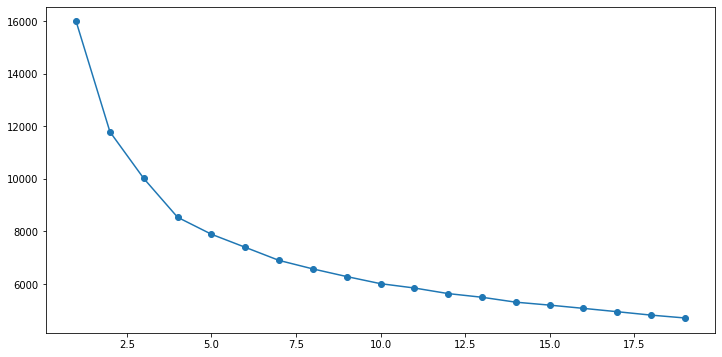

In [104]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df1.num_clusters, clusters_df1.cluster_errors, marker = "o" )

In [105]:
#Implement kmeans 
#we will take cluster =8
kmeans_model = KMeans(n_clusters = 8).fit(cluster_df)

In [106]:
labels=kmeans_model.labels_
labels=labels.tolist()
labels=pd.Series(data=labels,index=range(len(labels)))

In [107]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [108]:
# Calculating the centroids
centroids=kmeans_model.cluster_centers_

In [109]:
# Creating a dataframe for the centroids
index=['C0','C1','C2','C3','C4','C5','C6','C7']
columns=san_train.columns
centroid_df=pd.DataFrame(centroids,index,columns)
centroid_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
C0  0.288352           0.878741   0.039619          0.054523   
C1  0.164851           0.770721   0.054679          0.075266   
C2  0.227650           0.902603   0.482193          0.712422   
C3  0.208200           0.975741   0.900643          0.847683   
C4  0.873910           0.982555   0.090529          0.114681   
C5  0.195291           0.908829   0.251659          0.082348   
C6  0.017137           0.827336   0.243054          0.048083   
C7  0.787583           0.987920   0.770309          0.659052   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
C0                0.022389      0.661859             0.087368   
C1                0.034078      0.072478             0.139157   
C2                0.071820      0.055009             0.626395   
C3                0.741477      0.031912             0.953019   
C4                0.059106      0.844025             0.187734   
C5                0.440962      0.077603             0.862673   
C6                0.440918      0.009411             0.777856   
C7                0.722493      0.568500             0.912302   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
C0                    0.049535                          0.037547   
C1                    0.069385                          0.066991   
C2                    0.569835                          0.114767   
C3                    0.697334                          0.780753   
C4                    0.089725                          0.097028   
C5                    0.085400                          0.812675   
C6                    0.057013                          0.709955   
C7                    0.470367                          0.783865   

    CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
C0                0.332228  ...          0.272253          0.138851  0.840759   
C1                0.072412  ...          0.222586          0.085143  0.928102   
C2                0.040938  ...          0.249442          0.261404  0.933404   
C3                0.022883  ...          0.197441          0.543418  0.982809   
C4                0.423449  ...          0.784881          0.038017  0.937627   
C5                0.055411  ...          0.320378          0.045575  0.929522   
C6                0.007445  ...          0.086620          0.936117  0.887052   
C7                0.276181  ...          0.753201          0.070434  0.968386   

    MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  Monthly_INSTALLMENTS_PURCHASES  \
C0              0.016623      0.275514                        0.007872   
C1              0.029026      0.054104                        0.014789   
C2              0.106366      0.030999                        0.023268   
C3              0.081066      0.018712                        0.083458   
C4              0.029704      0.236477                        0.016566   
C5              0.026309      0.044724                        0.050133   
C6              0.028867      0.006036                        0.060052   
C7              0.076025      0.188885                        0.081758   

    Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  LIMIT_USAGE  PAY_MIN_PAY  
C0                  0.031020     0.012035     0.032473     0.000975  
C1                  0.050784     0.024063     0.024600     0.001335  
C2                  0.186413     0.065459     0.019503     0.000958  
C3                  0.132874     0.027253     0.012391     0.001752  
C4                  0.052522     0.019218     0.037443     0.000244  
C5                  0.038730     0.017551     0.027694     0.002293  
C6                  0.024574     0.021646     0.002238     0.000816  
C7                  0.134959     0.026100     0.033644     0.000367  

[8 rows x 24 columns]

In [110]:
#Adding the clusters to the dataframe
san_train['cluster']=list(kmeans_model.labels_)

In [111]:
san_train.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1446.65   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2780.618615             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE  \
0                0.000000  ...          0.000000      12   
1                0.250000  ...          0.222222      12   
2                0.000000  ...          0.000000      12   
3                0.083333  ...          0.000000      12   
4                0.000000  ...          0.000000      12   

   MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  Monthly_INSTALLMENTS_PURCHASES  \
0             47.699905      0.000000                       95.400382   
1              0.000000    926.872872                        0.000000   
2             64.430833      0.000000                        0.000000   
3           1499.005996    205.788840                        0.000000   
4             16.000064      0.000000                        0.000000   

   Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  LIMIT_USAGE  PAY_MIN_PAY  cluster  
0                  0.000000    47.700000     0.040901     1.446508        1  
1                  0.000000     0.000000     0.457495     3.826241        4  
2                 64.430833    64.430833     0.332687     0.991682        2  
3               1446.655787  1499.000000     0.222223     0.000000        2  
4                 16.000064    16.000000     0.681429     2.771075        1  

[5 rows x 25 columns]

C:\Users\PranjalJain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


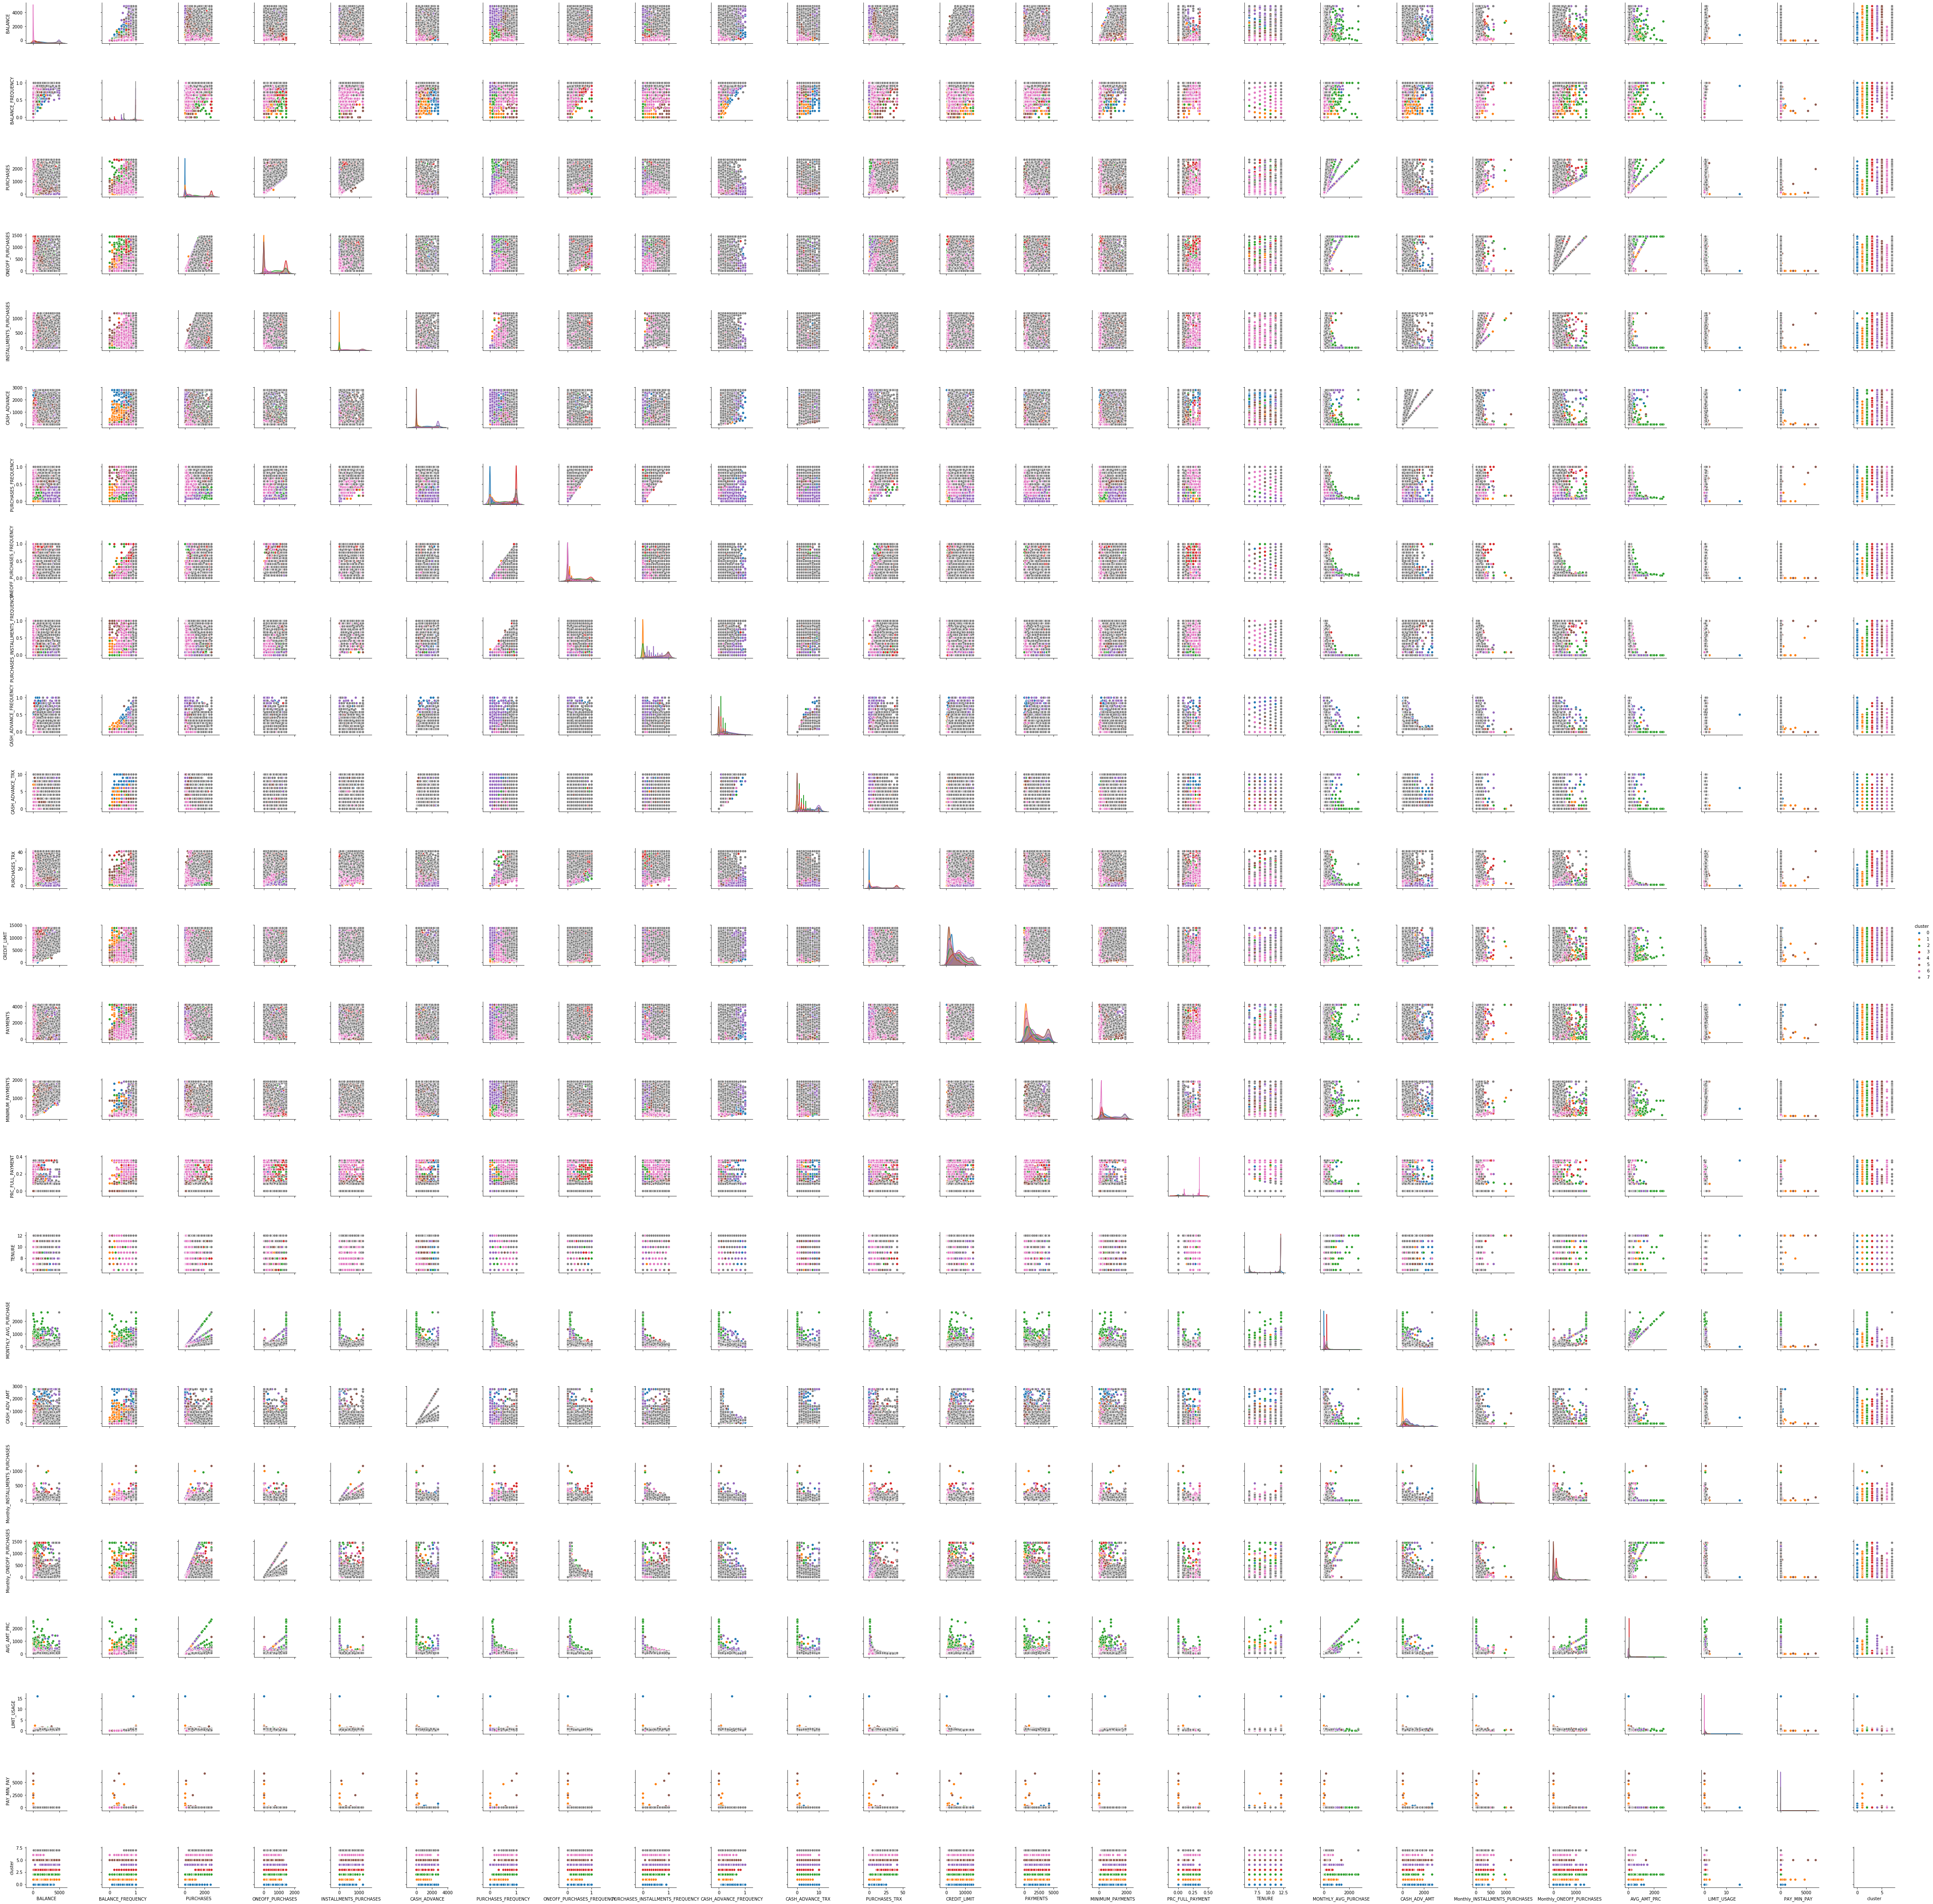

In [112]:
sns.pairplot(san_train, hue="cluster")

## REFINING THE APPROACH THROUGH ITERATION


### Selecting best variable with help of factor Analysis

In [113]:
#Factor Analysis
transformer = FactorAnalysis(n_components=10, random_state=0)
transformer.fit(df_std)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [114]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(san_train.columns)):
    components_df.rename(columns={i:san_train.columns[i]},inplace=True)
    

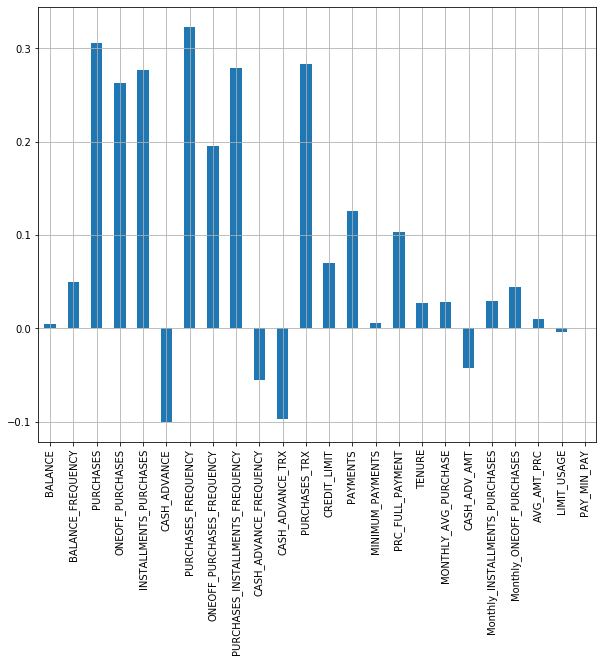

In [115]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [116]:

components_df.loc[0].sort_values()

CASH_ADVANCE                       -0.100482
CASH_ADVANCE_TRX                   -0.097361
CASH_ADVANCE_FREQUENCY             -0.055677
CASH_ADV_AMT                       -0.042565
LIMIT_USAGE                        -0.004323
PAY_MIN_PAY                         0.000231
BALANCE                             0.004527
MINIMUM_PAYMENTS                    0.005156
AVG_AMT_PRC                         0.009914
TENURE                              0.027410
MONTHLY_AVG_PURCHASE                0.028006
Monthly_INSTALLMENTS_PURCHASES      0.029414
Monthly_ONEOFF_PURCHASES            0.043979
BALANCE_FREQUENCY                   0.049747
CREDIT_LIMIT                        0.069636
PRC_FULL_PAYMENT                    0.103394
PAYMENTS                            0.125167
ONEOFF_PURCHASES_FREQUENCY          0.194813
ONEOFF_PURCHASES                    0.262308
INSTALLMENTS_PURCHASES              0.277096
PURCHASES_INSTALLMENTS_FREQUENCY    0.278524
PURCHASES_TRX                       0.283139
PURCHASES 

### Features to be included in our clustering model will be selected based on components with max variance!
##### PURCHASES_FREQUENCY                 
##### PURCHASES                           
##### PURCHASES_TRX                       
##### PURCHASES_INSTALLMENTS_FREQUENCY    
##### INSTALLMENTS_PURCHASES              
##### ONEOFF_PURCHASES                    
##### ONEOFF_PURCHASES_FREQUENCY          
##### PAYMENTS                            
##### PRC_FULL_PAYMENT                    
##### CREDIT_LIMIT


In [117]:
best_col = ["PURCHASES_FREQUENCY", "PURCHASES", "PURCHASES_TRX","PURCHASES_INSTALLMENTS_FREQUENCY",
             "INSTALLMENTS_PURCHASES", "ONEOFF_PURCHASES","ONEOFF_PURCHASES_FREQUENCY","PAYMENTS" ,"PRC_FULL_PAYMENT","CREDIT_LIMIT"]

In [118]:
# VISUALIZING,DESCRIBING AND EXPLAINING THE CLUSTERS
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = san_train[best_col].iloc[ :, :].values
y_pred = kmeans.fit_predict(best_vals)
san_train.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1446.65   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2780.618615             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE  \
0                0.000000  ...          0.000000      12   
1                0.250000  ...          0.222222      12   
2                0.000000  ...          0.000000      12   
3                0.083333  ...          0.000000      12   
4                0.000000  ...          0.000000      12   

   MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  Monthly_INSTALLMENTS_PURCHASES  \
0             47.699905      0.000000                       95.400382   
1              0.000000    926.872872                        0.000000   
2             64.430833      0.000000                        0.000000   
3           1499.005996    205.788840                        0.000000   
4             16.000064      0.000000                        0.000000   

   Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  LIMIT_USAGE  PAY_MIN_PAY  cluster  
0                  0.000000    47.700000     0.040901     1.446508        1  
1                  0.000000     0.000000     0.457495     3.826241        4  
2                 64.430833    64.430833     0.332687     0.991682        2  
3               1446.655787  1499.000000     0.222223     0.000000        2  
4                 16.000064    16.000000     0.681429     2.771075        1  

[5 rows x 25 columns]

In [119]:
san_train["cluster"] = y_pred
best_col.append("cluster")
san_train.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1446.65   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2780.618615             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE  \
0                0.000000  ...          0.000000      12   
1                0.250000  ...          0.222222      12   
2                0.000000  ...          0.000000      12   
3                0.083333  ...          0.000000      12   
4                0.000000  ...          0.000000      12   

   MONTHLY_AVG_PURCHASE  CASH_ADV_AMT  Monthly_INSTALLMENTS_PURCHASES  \
0             47.699905      0.000000                       95.400382   
1              0.000000    926.872872                        0.000000   
2             64.430833      0.000000                        0.000000   
3           1499.005996    205.788840                        0.000000   
4             16.000064      0.000000                        0.000000   

   Monthly_ONEOFF_PURCHASES  AVG_AMT_PRC  LIMIT_USAGE  PAY_MIN_PAY  cluster  
0                  0.000000    47.700000     0.040901     1.446508        4  
1                  0.000000     0.000000     0.457495     3.826241        5  
2                 64.430833    64.430833     0.332687     0.991682        3  
3               1446.655787  1499.000000     0.222223     0.000000        3  
4                 16.000064    16.000000     0.681429     2.771075        4  

[5 rows x 25 columns]

C:\Users\PranjalJain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


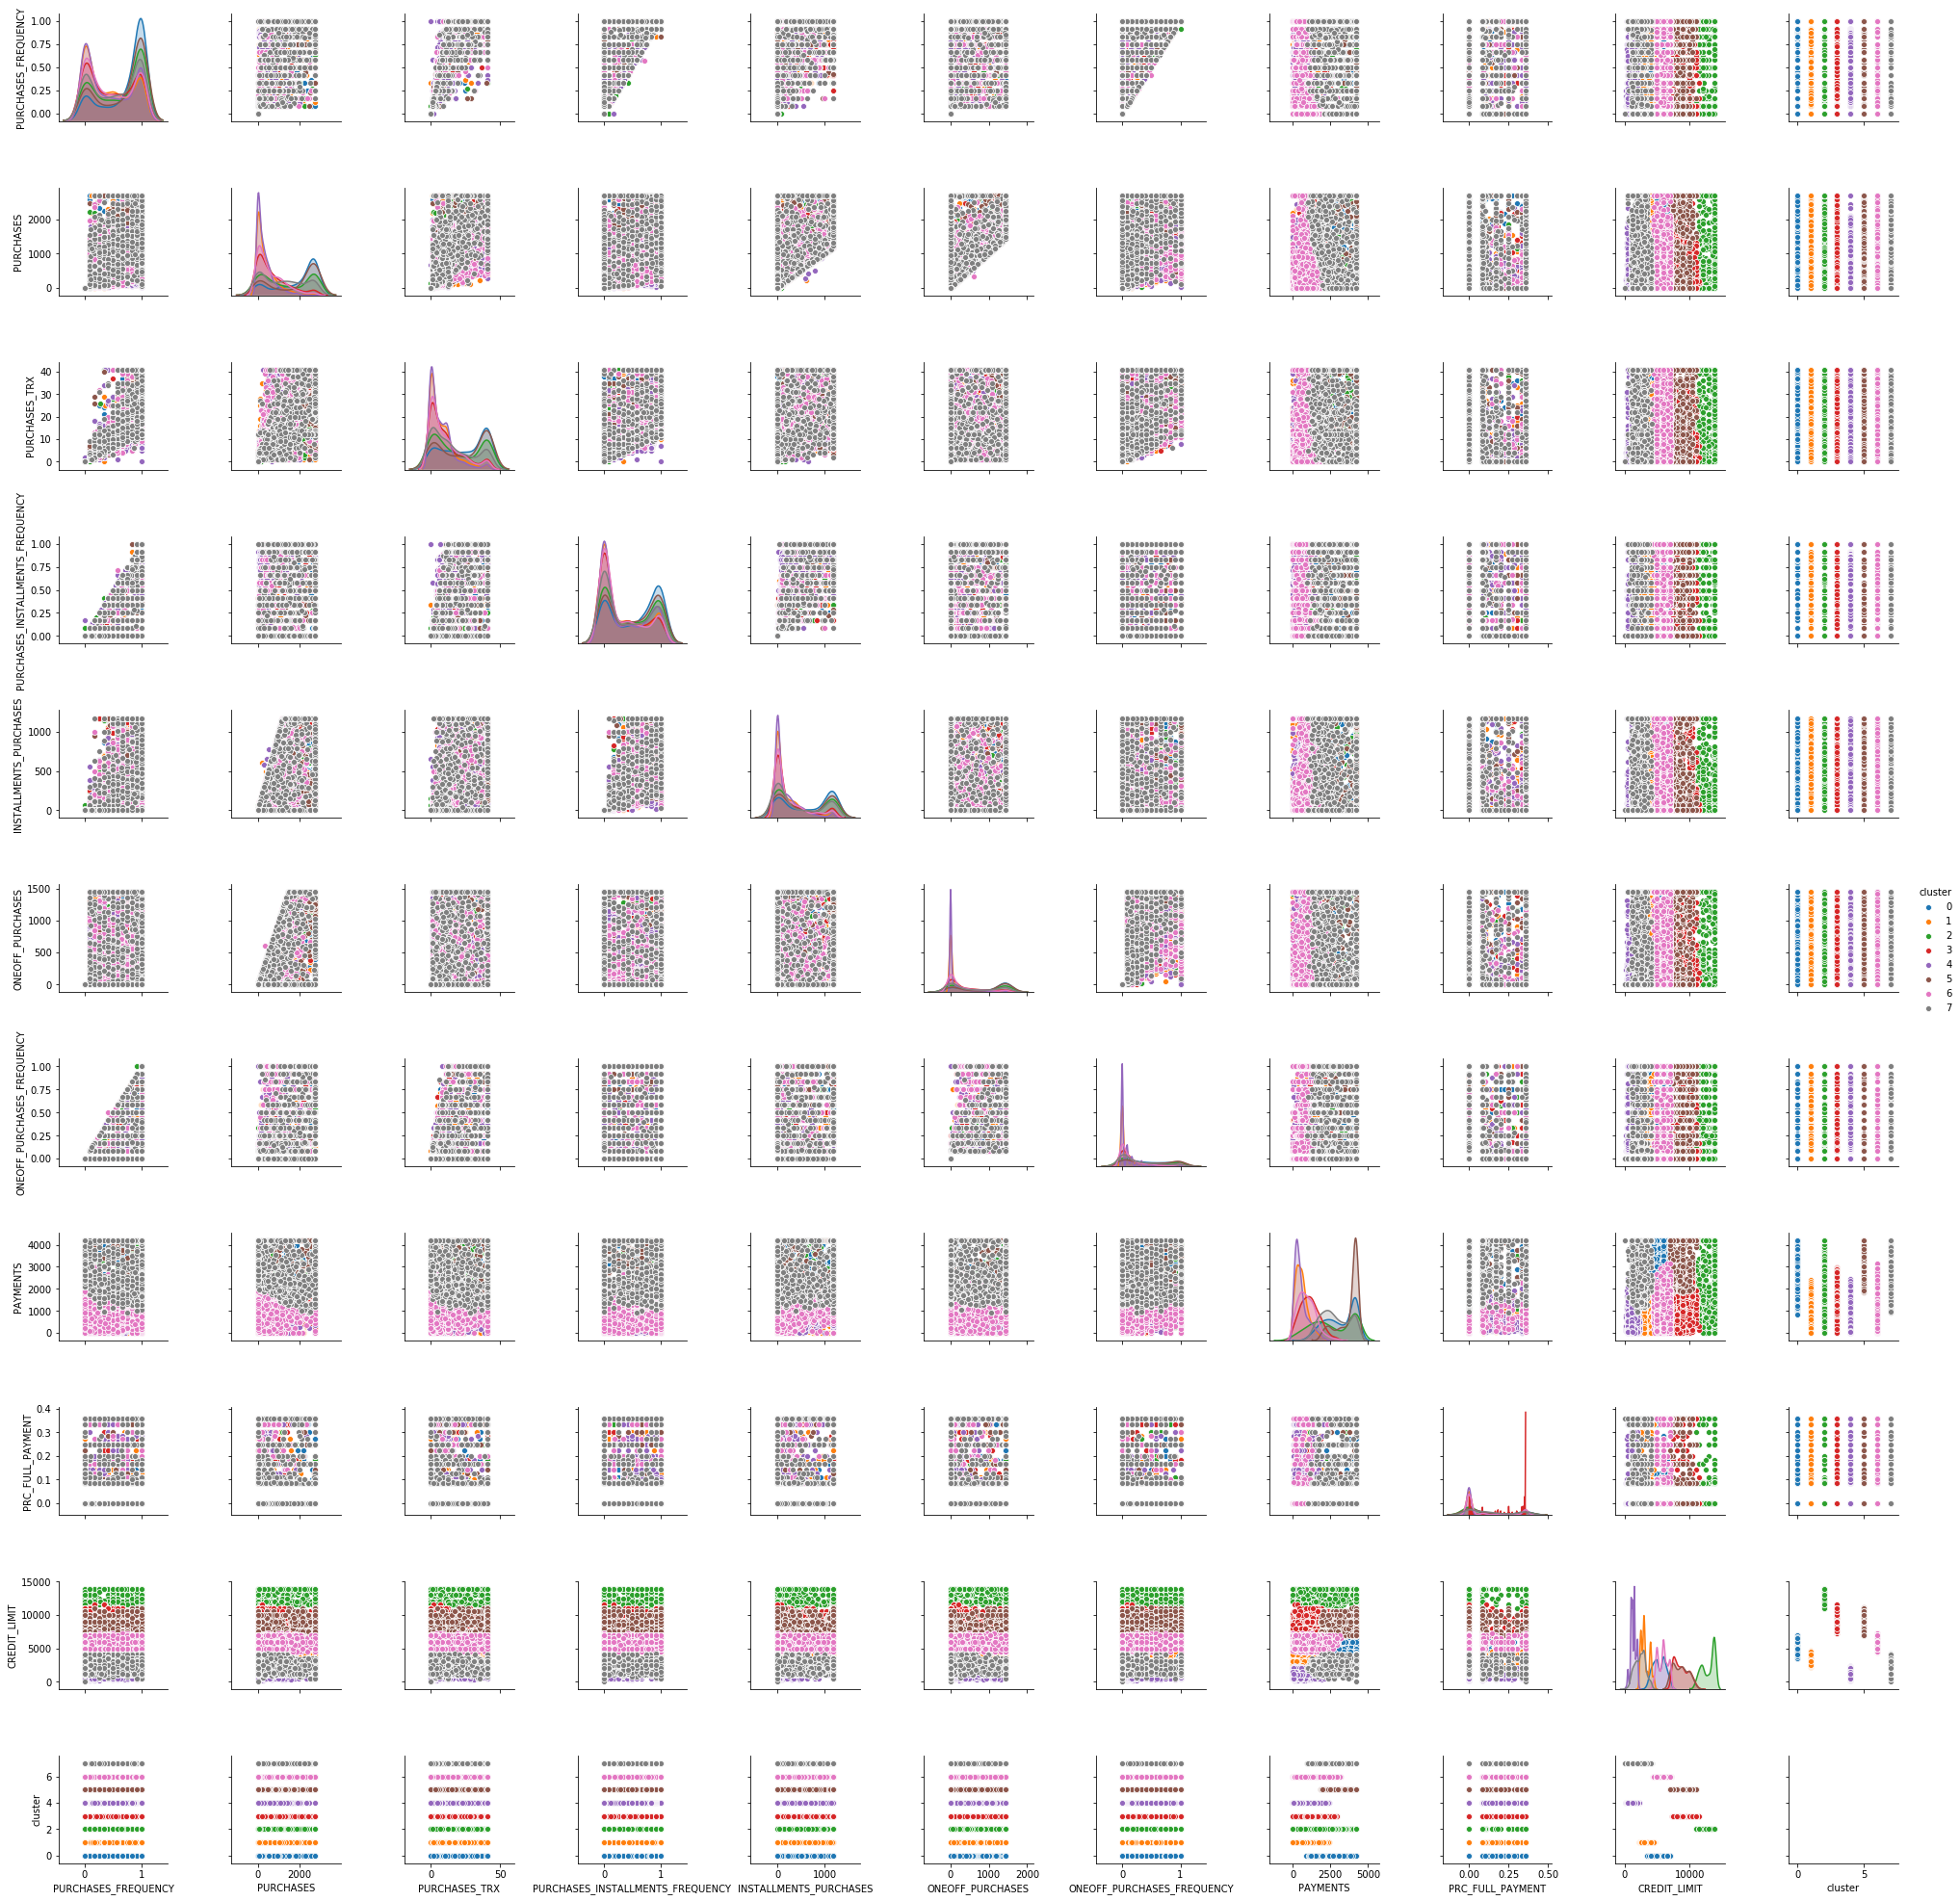

In [120]:
sns.pairplot( san_train[best_col], hue="cluster")

4    2721
1    1903
6    1120
7     783
3     746
0     627
2     552
5     489
Name: cluster, dtype: int64

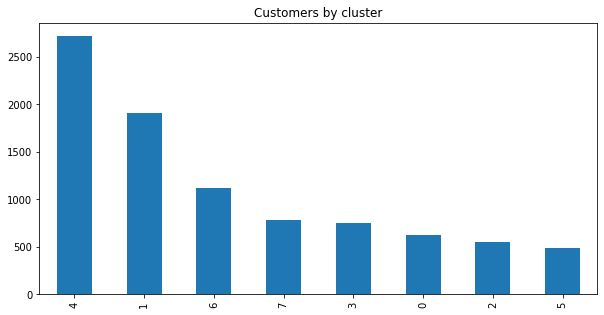

In [121]:
# Number of clients by cluster
san_train['cluster'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster');

san_train['cluster'].value_counts()

In [122]:
# Creating a dataframe for the centroids
centroids=kmeans.cluster_centers_
index=['C0','C1','C2','C3','C4','C5','C6','C7']
columns= ["PURCHASES_FREQUENCY", "PURCHASES", "PURCHASES_TRX","PURCHASES_INSTALLMENTS_FREQUENCY",
             "INSTALLMENTS_PURCHASES", "ONEOFF_PURCHASES","ONEOFF_PURCHASES_FREQUENCY","PAYMENTS" ,"PRC_FULL_PAYMENT","CREDIT_LIMIT"]
centroid_df=pd.DataFrame(centroids,index,columns)
centroid_df["CLUSTER"]=index

In [123]:
centroid_df.to_csv('centroid.csv',index=False)
